<a href="https://colab.research.google.com/github/ricardodhuelsmann/neural_network_UV/blob/main/noise_neural_network_spectra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''Importar bibliotecas necessárias'''
import numpy as np
import matplotlib.pyplot as pp
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense

In [24]:
'''Carregar dados de arquivo CSV, e separar fração para treino e teste'''
input_data = np.genfromtxt('input_noise.csv', delimiter=';')
output_data = np.genfromtxt('output_noise.csv', delimiter=';')
print("Tamanho de dados de entrada: ", len(input_data))
print("Tamanho de dados de saída: ", len(output_data))
x_train = input_data[1:201]
x_test = input_data[201:]
print("Tamanho de matriz de treino: ", len(x_train))
print("Tamanho de matriz de teste: ", len(x_test))
print("Tamanho total de dados de treino: ", x_train.size)
print("Tamanho total de dados de teste: ", x_test.size)
y_train = output_data[1:201]
y_test = output_data[201:]
input_shape_size = int(x_train.size/len(x_train))
print(input_shape_size)

Tamanho de dados de entrada:  251
Tamanho de dados de saída:  251
Tamanho de matriz de treino:  200
Tamanho de matriz de teste:  50
Tamanho total de dados de treino:  80200
Tamanho total de dados de teste:  20050
401


In [25]:
print(x_train)
print(x_test)

[[0.29255096 0.29888756 0.30523202 ... 0.1369904  0.13131767 0.12583609]
 [0.2343674  0.23934198 0.24433236 ... 0.11778932 0.11297749 0.10833197]
 [0.20656228 0.21104711 0.21554557 ... 0.09494868 0.09093096 0.08705766]
 ...
 [0.05338902 0.05454143 0.05568591 ... 0.05938308 0.05846818 0.05756   ]
 [0.0489956  0.05025097 0.0514921  ... 0.05412448 0.05358652 0.05303883]
 [0.01787901 0.01817495 0.0184674  ... 0.01994953 0.01986731 0.01978278]]
[[0.26910829 0.27480817 0.28051901 ... 0.11269749 0.10754153 0.10257168]
 [0.23964001 0.24482812 0.25002288 ... 0.12167143 0.11725063 0.11297757]
 [0.15410786 0.15746946 0.16084605 ... 0.09838026 0.09519645 0.09211654]
 ...
 [0.16405234 0.16757784 0.17108982 ... 0.05863204 0.05601164 0.05347642]
 [0.10092166 0.103102   0.10527421 ... 0.05456084 0.05280774 0.05110155]
 [0.02886257 0.02949166 0.03011774 ... 0.0441485  0.04355243 0.04295786]]


In [57]:
'''Configurar parâmetros da rede neural'''
# change these values to experiment
epochs = 200         # number of times the full data trains the network params
batch_size = 200    # the amount of data which goes into the network at once
num_neurons = 150     # number of neurons required in middle layer

In [27]:
''' Criar modelo de rede neural, adicionando camadas, definindo número de neuros, ativação, medidas de erro e otimização'''
def get_model():
  model = Sequential()
  model.add(Dense(num_neurons, input_shape=(input_shape_size, ),  activation='relu'))
  model.add(Dense(num_neurons, input_shape=(num_neurons,), activation='relu'))
  model.add(Dense(num_neurons, input_shape=(num_neurons,), activation='relu'))
  model.add(Dense(2))
  print(model.summary())
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
  return model
  

In [28]:
''' Treinar modelo a partir de parâmetros especificados'''
def train_model(X, y, model, epochs, batch_size):
  h = model.fit(X, y, validation_split=0.2,
               epochs=epochs,
               batch_size=batch_size,
               verbose=1)
  pp.figure(figsize=(15,2.5))
  pp.plot(h.history['loss'])
  pp.title('Training loss wrt time')
  return model

In [43]:
''' Fazer a previsão de valores a partir de rede treinada e comparar valores com o esperado'''
def predict_model(X):
  prediction = model.predict(X)
  print("Valores: \n", y_test[:])
  print("Valores: \n", y_test[:]/prediction*100)
  print("\nMédia", np.mean(y_test[:]/prediction*100, axis=0))
  print("Desvio", np.std(y_test[:]/prediction*100, axis=0))

  print("\nMédia 95%", np.mean(y_test[:10]/prediction[:10]*100, axis=0))
  print("Desvio", np.std(y_test[:10]/prediction[:10]*100, axis=0))

  print("\nMédia 75%", np.mean(y_test[10:20]/prediction[10:20]*100, axis=0))
  print("Desvio", np.std(y_test[10:20]/prediction[10:20]*100, axis=0))

  print("\nMédia 50%", np.mean(y_test[20:30]/prediction[20:30]*100, axis=0))
  print("Desvio", np.std(y_test[20:30]/prediction[20:30]*100, axis=0))

  print("\nMédia 30%", np.mean(y_test[30:40]/prediction[30:40]*100, axis=0))
  print("Desvio", np.std(y_test[30:40]/prediction[30:40]*100, axis=0))

  print("\nMédia 5%", np.mean(y_test[40:]/prediction[40:]*100, axis=0))
  print("Desvio", np.std(y_test[40:]/prediction[40:]*100, axis=0))


In [ ]:
'''Gerar modelo'''
model = get_model()

Epoch 1/200
1/1 [==============================] - 1s 669ms/step - loss: 0.5498 - accuracy: 0.6687 - val_loss: 0.0868 - val_accuracy: 0.1500
Epoch 2/200
1/1 [==============================] - 0s 31ms/step - loss: 0.0696 - accuracy: 0.7688 - val_loss: 0.0681 - val_accuracy: 0.8500
Epoch 3/200
1/1 [==============================] - 0s 35ms/step - loss: 0.1129 - accuracy: 0.8062 - val_loss: 0.0603 - val_accuracy: 0.8500
Epoch 4/200
1/1 [==============================] - 0s 36ms/step - loss: 0.0958 - accuracy: 0.9312 - val_loss: 0.0522 - val_accuracy: 0.8500
Epoch 5/200
1/1 [==============================] - 0s 32ms/step - loss: 0.0393 - accuracy: 0.8750 - val_loss: 0.0554 - val_accuracy: 0.8750
Epoch 6/200
1/1 [==============================] - 0s 32ms/step - loss: 0.0509 - accuracy: 0.8375 - val_loss: 0.0549 - val_accuracy: 0.9000
Epoch 7/200
1/1 [==============================] - 0s 36ms/step - loss: 0.0555 - accuracy: 0.8250 - val_loss: 0.0467 - val_accuracy: 0.9000
Epoch 8/200
1/1 [==

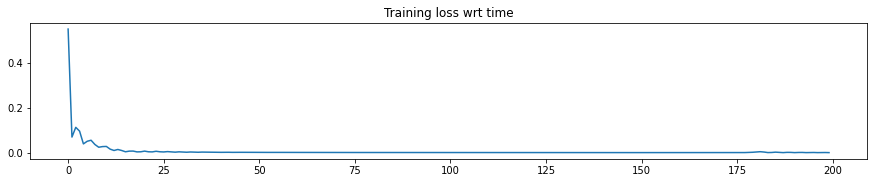

In [59]:
'''Treinar modelo'''
model = train_model(x_train, y_train, model, epochs, batch_size)

In [60]:
'''Avaliar modelo'''
predict_model(x_test)

Valores: 
 [[0.95 0.95]
 [0.95 0.75]
 [0.95 0.5 ]
 [0.95 0.3 ]
 [0.95 0.05]
 [0.95 0.95]
 [0.95 0.75]
 [0.95 0.5 ]
 [0.95 0.3 ]
 [0.95 0.05]
 [0.75 0.95]
 [0.75 0.75]
 [0.75 0.5 ]
 [0.75 0.3 ]
 [0.75 0.05]
 [0.75 0.95]
 [0.75 0.75]
 [0.75 0.5 ]
 [0.75 0.3 ]
 [0.75 0.05]
 [0.5  0.95]
 [0.5  0.75]
 [0.5  0.5 ]
 [0.5  0.3 ]
 [0.5  0.05]
 [0.5  0.95]
 [0.5  0.75]
 [0.5  0.5 ]
 [0.5  0.3 ]
 [0.5  0.05]
 [0.3  0.95]
 [0.3  0.75]
 [0.3  0.5 ]
 [0.3  0.95]
 [0.3  0.05]
 [0.3  0.95]
 [0.3  0.75]
 [0.3  0.5 ]
 [0.3  0.3 ]
 [0.3  0.05]
 [0.05 0.95]
 [0.05 0.75]
 [0.05 0.5 ]
 [0.05 0.3 ]
 [0.05 0.05]
 [0.05 0.95]
 [0.05 0.75]
 [0.05 0.5 ]
 [0.05 0.3 ]
 [0.05 0.05]]
Valores: 
 [[101.58223456  98.05998507]
 [101.13120133  92.43609868]
 [101.58987479  94.82395707]
 [101.77966248 102.33168103]
 [100.35750984  53.66810128]
 [100.9204988   92.49412886]
 [100.8782644   93.05312141]
 [100.82979465  89.99136412]
 [101.55820768 115.29916439]
 [100.48759925  79.75281083]
 [101.87357032 100.75172207]
 [102.64